# Exploratory Data Analysis - Crime Data Los Angeles

This notebook is used to explore the questions for the Data Scientist Exercise in July 2020.

- How else has reported crime changed over time in the City?
- Based on your analysis, please share any changes to services, programs, or policies that the City should consider.

##  Load libraries

In [68]:
# Import libraries
import os, sys, subprocess
import json
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)
%config InlineBackend.figure_format = 'retina'
# sns.set(style="whitegrid") 
plt.style.use('fivethirtyeight')


In [2]:
# load project config
terminal_call = ! git rev-parse --show-toplevel
repo_path=terminal_call[0]
project_config_path = os.path.join(repo_path,'project_config.json')

with open(project_config_path,'r') as fp: 
    project_config = json.load(fp)

In [3]:
# import custom module to look at trends
module_path = os.path.join(repo_path,project_config['project_module_relative_path'])
sys.path.append(module_path)

import trends
from trends import get_top_trends as gt
from trends import convert
from trends.convert import crime_dict, mocode_dict # load in crime name dictionary
from importlib import reload # for updating scripts

# Load in data

In [4]:
# load in data that was collected
df = pickle.load(open("../data/crime_data.pkl", "rb"))

In [5]:
# Explore summary info
def eda(df):
    nulls = pd.DataFrame(df.isnull().sum()).T # Check for nulls
    datatypes = pd.DataFrame(df.dtypes).T # Check datatypes
    summary = pd.concat([nulls, datatypes], keys = ["nulls", "datatypes"]) # Create pandas dataframe, because I think it's easier to read
    return summary

In [6]:
eda(df)

,,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,year,mocodes_1,mocodes_2,mocodes_3
nulls,0,0,0,0,0,0,0,0,0,0,0,240361,0,208478,208527,55,228,1464999,1465000,3,0,11,2063105,2206364,2209991,0,1837686,0,0,0,0,240361,240361
datatypes,0,int64,datetime64[ns],datetime64[ns],int64,int64,object,int64,int64,int64,object,object,int64,object,object,float64,object,float64,object,object,object,float64,float64,float64,float64,object,object,float64,float64,int64,int64,object,object


## How else has reported crime changed over time in the City?

In [184]:
# Code to plot time series

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(22,10))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=5)
    plt.ylabel(ylab, fontsize=18)
    
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [120]:
total_crimes = pd.DataFrame(df.groupby("year").size().reset_index(name ="total_cases"))

In [80]:
total_crimes.set_index("year", inplace = True)
total_crimes.head()

,total_cases
year,
2010,200536
2011,197858
2012,200110
2013,192146
2014,194966


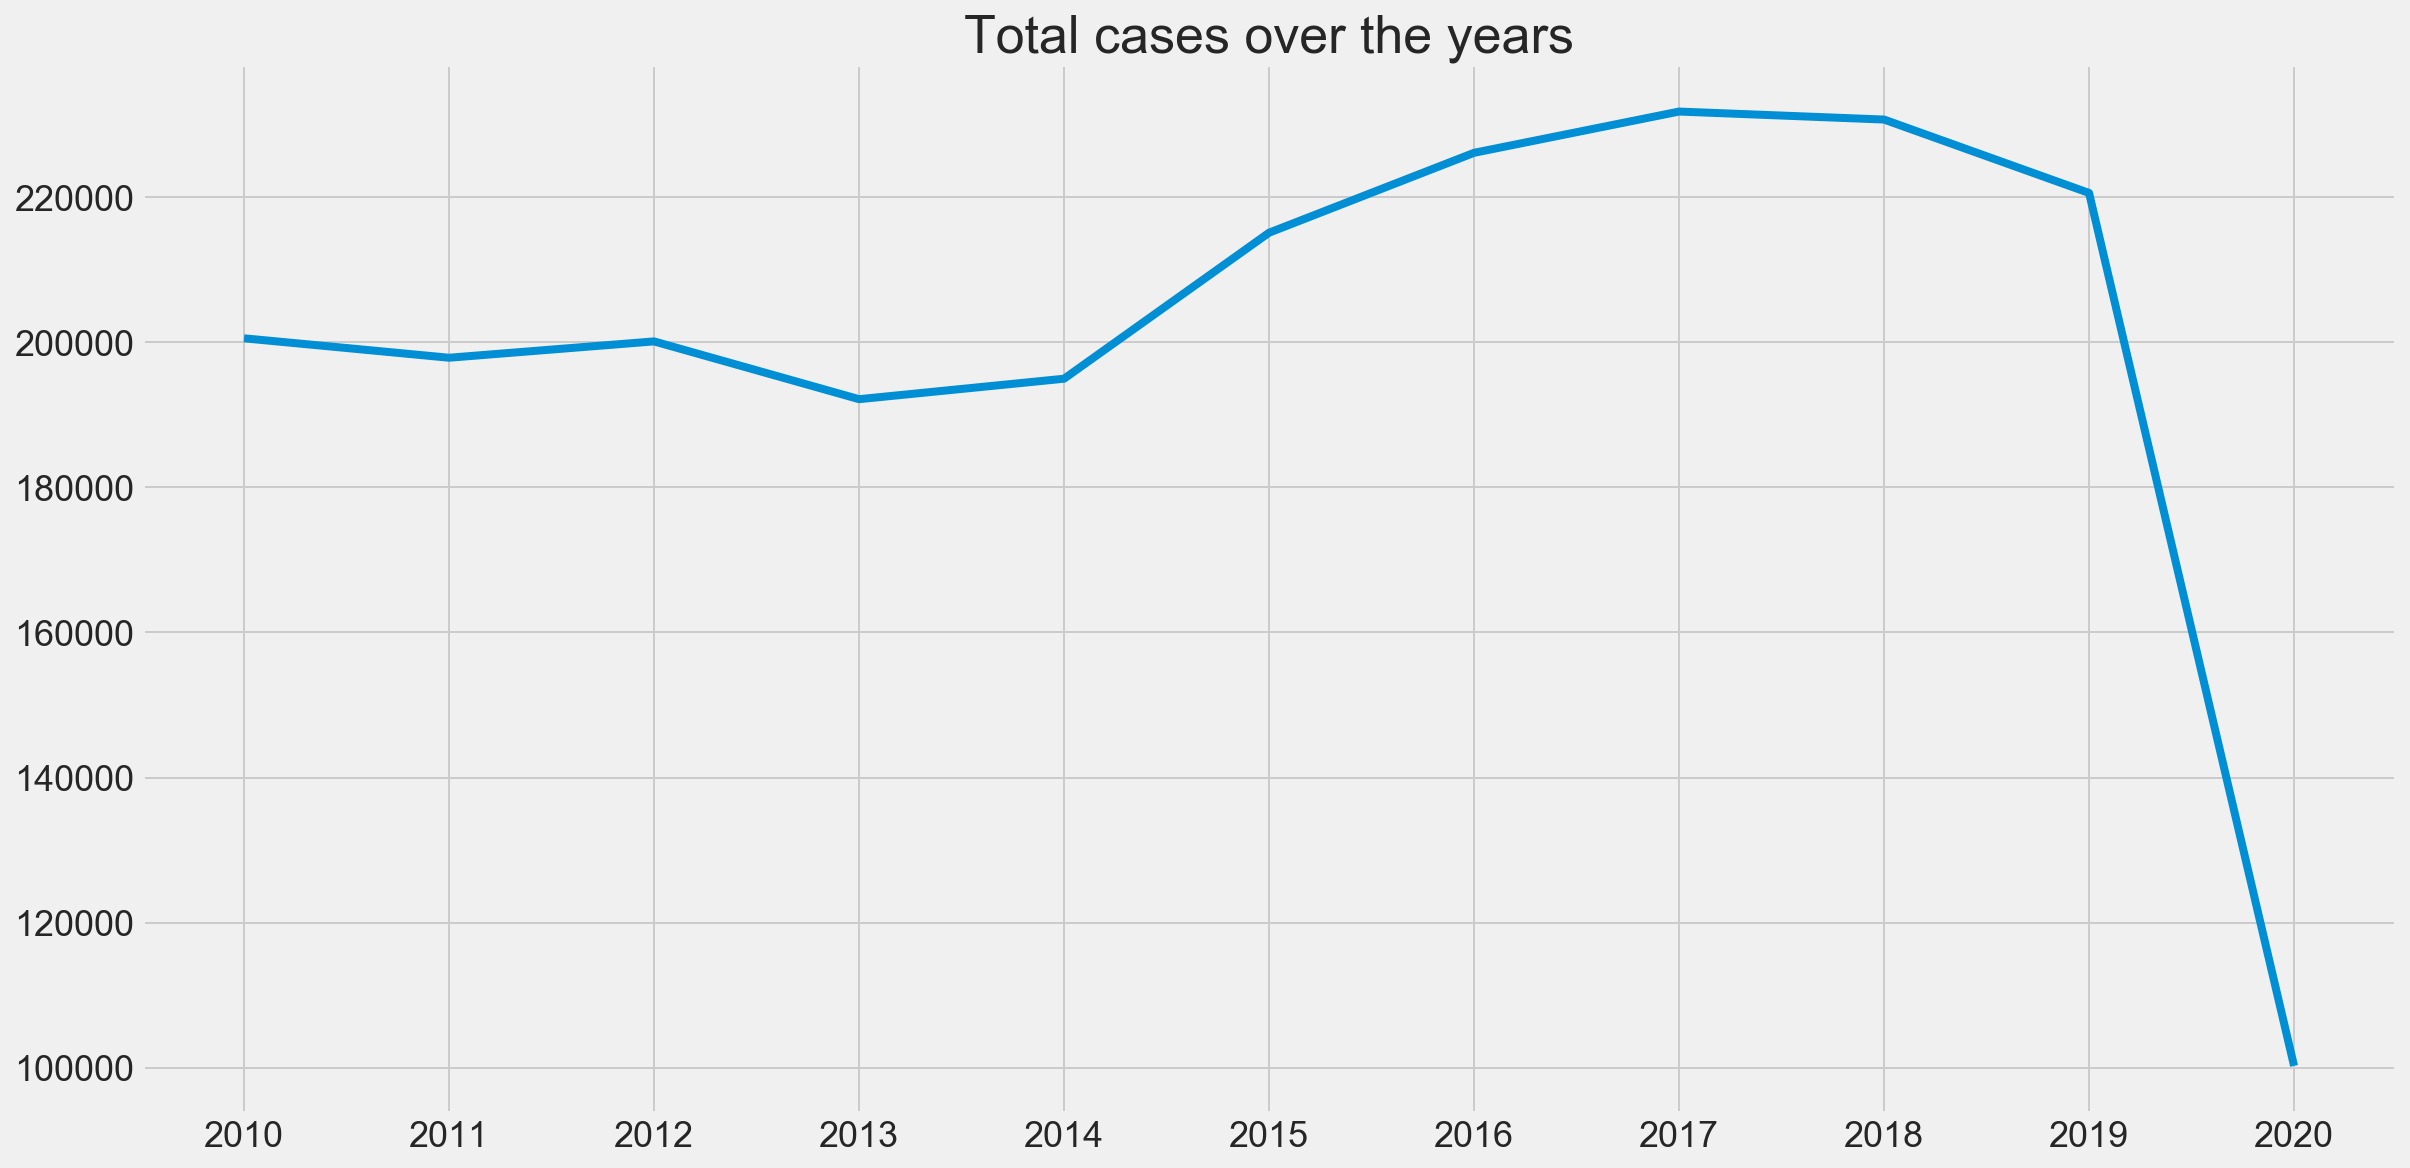

In [81]:
# Generate a time plot of our data.
plot_series(total_crimes,
            ['total_cases'],
            title = 'Total cases over the years',
            steps = 1);

## Calculate rolling mean for trends

In [110]:
crimes = pd.DataFrame(df.groupby("date_rptd").size().reset_index(name ="total_cases"))
crimes.set_index("date_rptd", inplace = True)

In [111]:
# rolling mean for 4 weeks
crimes["rolling_mean_month"] = crimes["total_cases"].rolling(30).mean()

# quarterly rolling mean
crimes["rolling_mean_quarter"] = crimes["total_cases"].rolling(120).mean()


# annual rolling mean
crimes["rolling_mean_annual"] = crimes["total_cases"].rolling(365).mean()

In [112]:
crimes.head()

,total_cases,rolling_mean_month,rolling_mean_quarter,rolling_mean_annual
date_rptd,,,,
2010-01-01,324,NaN,NaN,NaN
2010-01-02,372,NaN,NaN,NaN
2010-01-03,382,NaN,NaN,NaN
2010-01-04,464,NaN,NaN,NaN
2010-01-05,464,NaN,NaN,NaN


In [113]:
crimes.head()

,total_cases,rolling_mean_month,rolling_mean_quarter,rolling_mean_annual
date_rptd,,,,
2010-01-01,324,NaN,NaN,NaN
2010-01-02,372,NaN,NaN,NaN
2010-01-03,382,NaN,NaN,NaN
2010-01-04,464,NaN,NaN,NaN
2010-01-05,464,NaN,NaN,NaN


In [114]:
crimes.dtypes

total_cases             int64  
rolling_mean_month      float64
rolling_mean_quarter    float64
rolling_mean_annual     float64
dtype: object

In [141]:
def get_labels(s,t):
    labels =[]
    for x in pd.date_range(start=s, end=t, freq='3M'):
        labels.append(x.strftime("%Y-%m-%d"))
    return labels

In [161]:
dates= get_labels(df["date_rptd"].min(), df["date_rptd"].max())

In [ ]:
ax.xaxis.set_ticks(np.arange(min_x, max_x, int((max_x-min_x)/len(labels))))

In [173]:
len(dates)

42

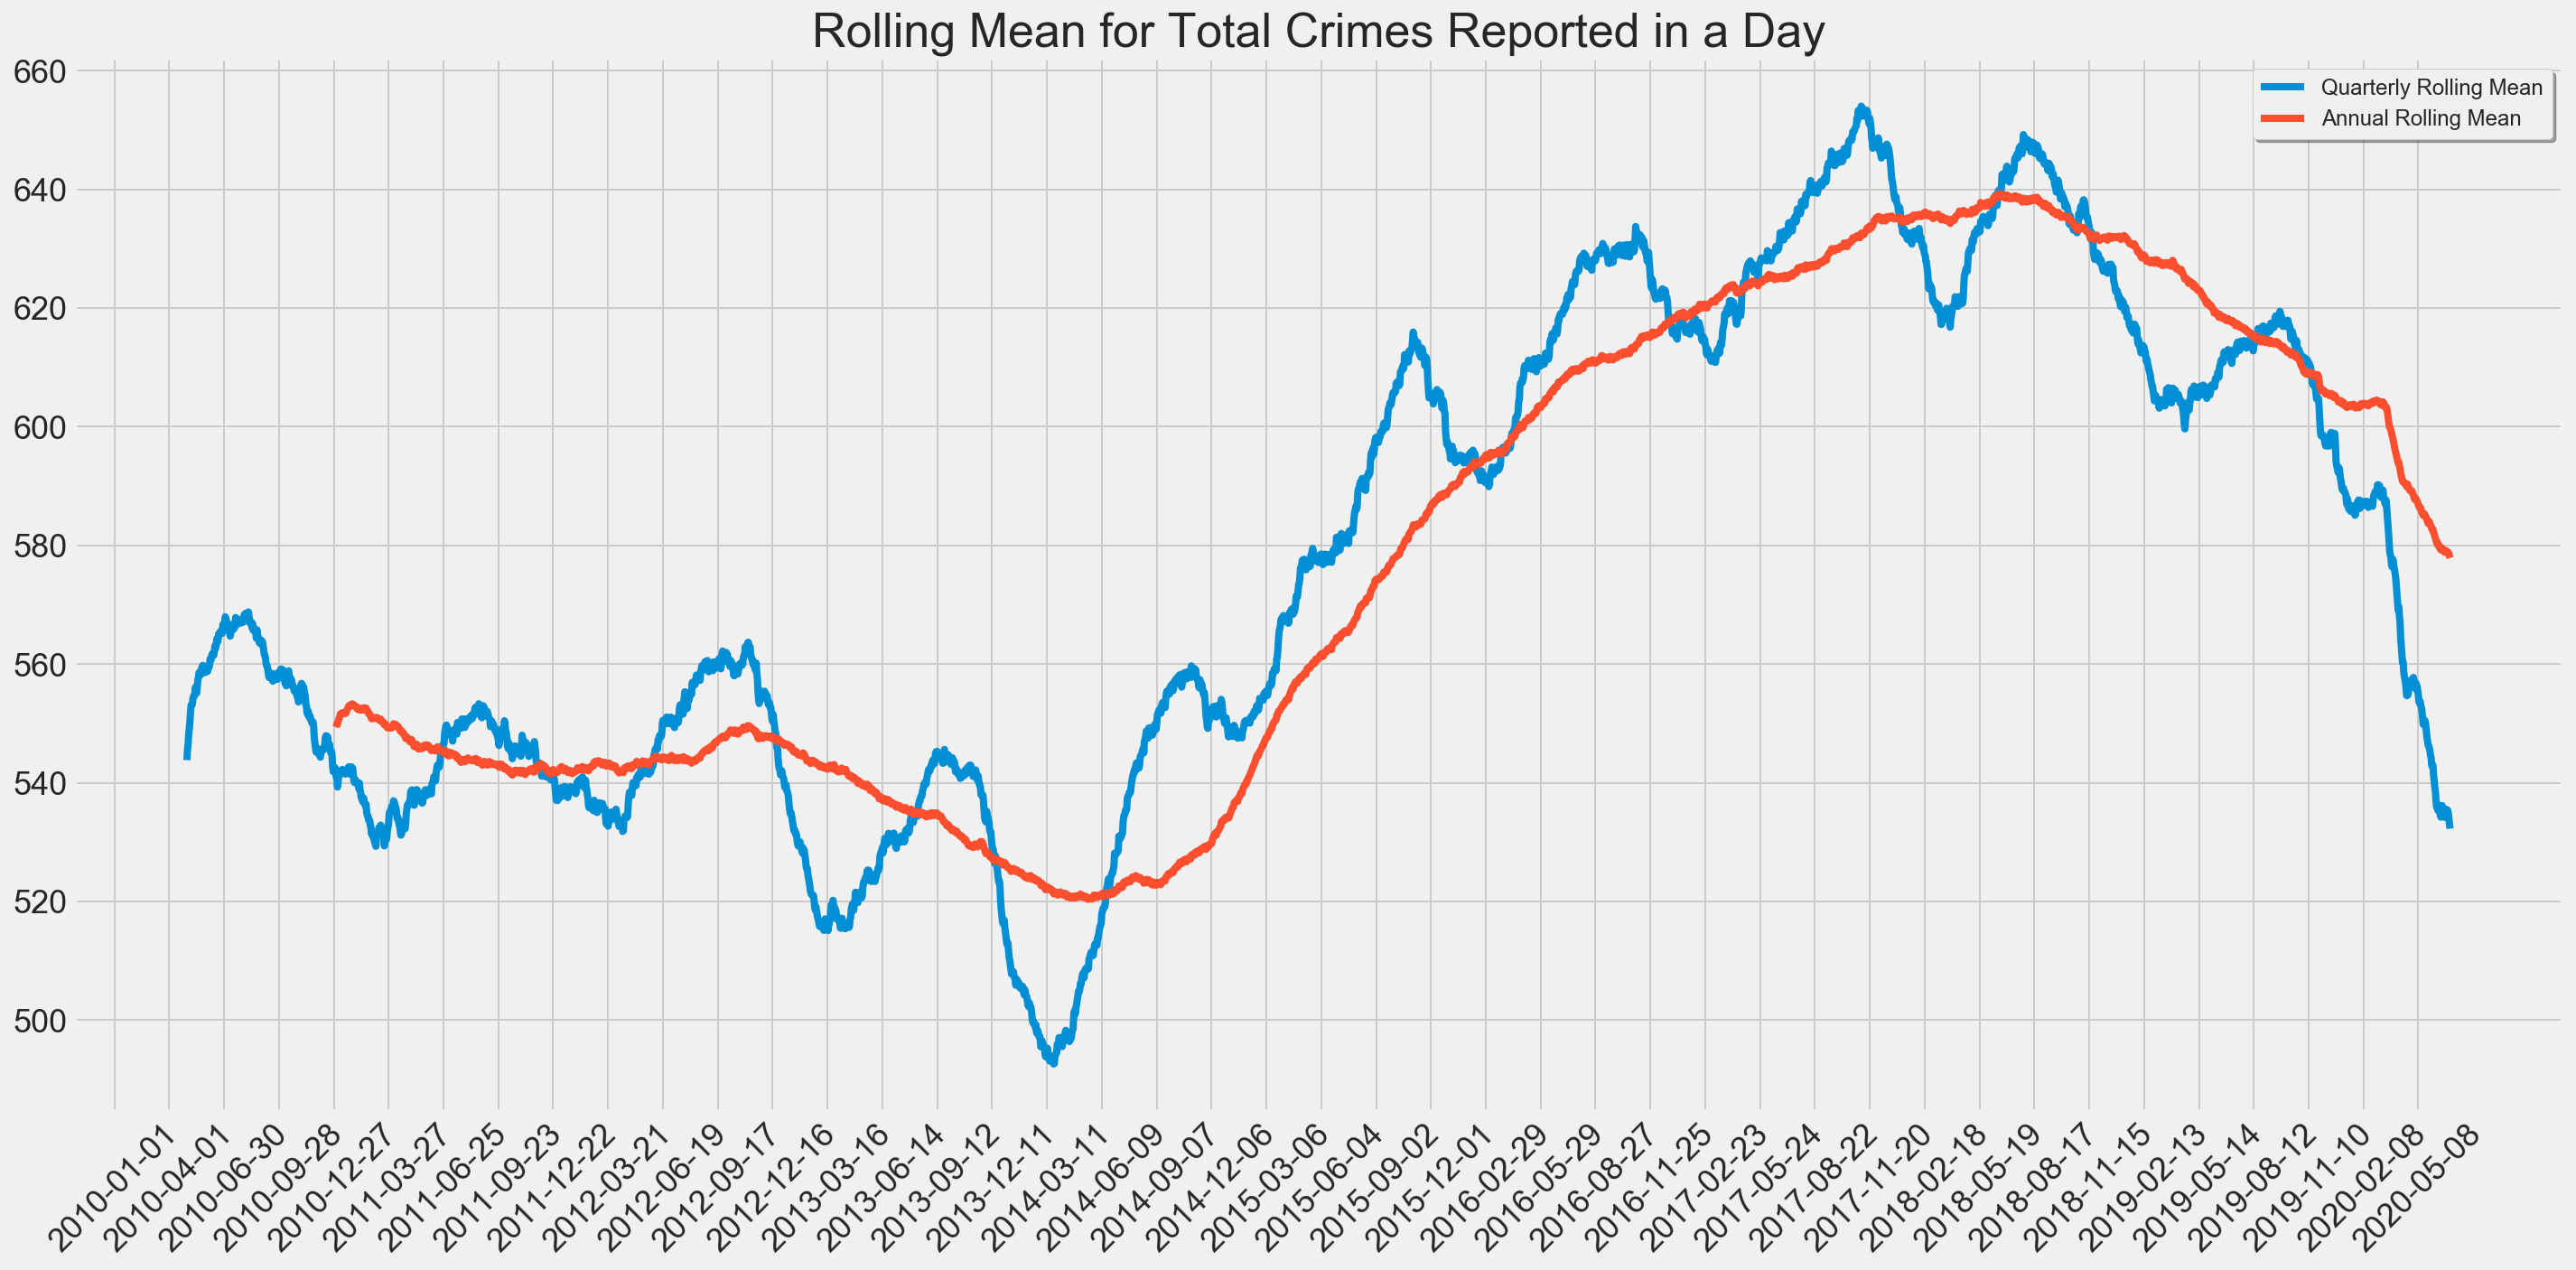

In [187]:
# Generate a time plot of our data.
plot_series(crimes,
            ["rolling_mean_quarter", "rolling_mean_annual"],
            title = 'Rolling Mean for Total Crimes Reported in a Day',
            steps = 90)

plt.legend(labels = ["Quarterly Rolling Mean", "Annual Rolling Mean"], loc='upper right',
          fancybox=True, shadow=True, fontsize = 12);

plt.xticks(rotation=45);